In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and merge datasets
file_paths = {
    "thumbup": "../Data_Extracting/emg_training_data_thumbup_time_series.csv",
    "fist": "../Data_Extracting/emg_training_data_fist_time_series.csv",
}

data_frames = []
for gesture, path in file_paths.items():
    df = pd.read_csv(path)
    df["gesture"] = gesture
    data_frames.append(df)

data = pd.concat(data_frames, ignore_index=True)

# Extract features and labels
X = data.iloc[:, :-1].values  # Exclude the label column
y = data.iloc[:, -1].values   # Label column

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN (samples, time_steps=50, features=6)
X_reshaped = X_scaled.reshape(len(X_scaled), 50, 6)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)


Epoch 1/100


C:\Users\Rohan Datta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6557 - loss: 1.0088 - val_accuracy: 0.6744 - val_loss: 0.6124
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7348 - loss: 0.8696 - val_accuracy: 0.8372 - val_loss: 0.4589
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7695 - loss: 0.9805 - val_accuracy: 0.6744 - val_loss: 0.5117
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7369 - loss: 0.7435 - val_accuracy: 0.9302 - val_loss: 0.3646
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7670 - loss: 0.7823 - val_accuracy: 0.9302 - val_loss: 0.2235
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7623 - loss: 0.6086 - val_accuracy: 0.3953 - val_loss: 1.0097
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8099 - loss: 0.4114 - val_accuracy: 0.9302 - val_loss: 0.1591
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7814 - loss: 0.5635 - val_accuracy: 0.4419 - val_loss: 1.

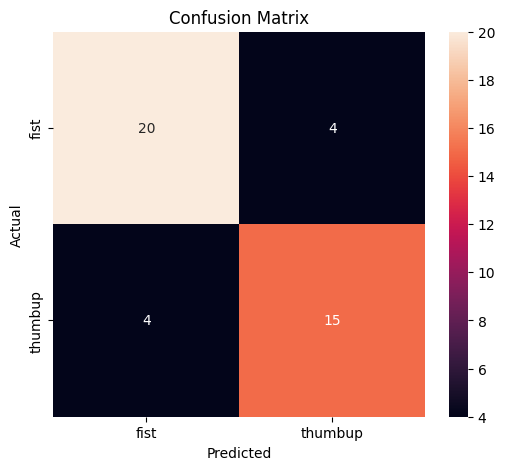

In [7]:
# Build CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(50, 6)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test))

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model
model.save("emg_gesture_cnn_model.h5")